# Linear Regression
## Importing Libraries 

In [1]:
#importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
#reading files
dt=pd.read_csv('delivery_time.csv')
dt.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


## Plotting graph to understand data

(array([[0., 0., 2., 3., 4., 4., 4., 2., 1., 1.],
        [7., 8., 6., 0., 0., 0., 0., 0., 0., 0.]]),
 array([ 2. ,  4.7,  7.4, 10.1, 12.8, 15.5, 18.2, 20.9, 23.6, 26.3, 29. ]),
 <a list of 2 BarContainer objects>)

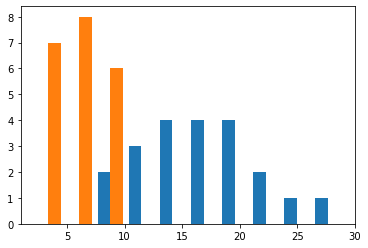

In [3]:
plt.hist(dt)

## Renaming the columns 

In [4]:
#renaming the columns 
dt=dt.rename(columns={'Delivery Time':'DeliveryT','Sorting Time':'SortingT'})

In [5]:
dt.head()

,DeliveryT,SortingT
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


## Checking the Correlation

In [6]:
#checking the correlation
dt.corr()

,DeliveryT,SortingT
DeliveryT,1.000000,0.825997
SortingT,0.825997,1.000000


In [7]:
dt.describe()

,DeliveryT,SortingT
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [8]:
X=dt[['SortingT']]
Y=dt['DeliveryT']
X.shape

(21, 1)

## Creating model with OLS and sklearn

In [9]:
#creating model with OLS method
model=sm.OLS(X,Y).fit()

In [10]:
pred_1=model.predict()

In [11]:
#creating model with sklearn library
model_sk=LinearRegression()

In [12]:
model_sk.fit(X,Y)

LinearRegression()

In [13]:
pred = model_sk.predict(X)

In [14]:
pred

array([23.07293294, 13.17881356, 16.47685335, 21.42391304, 23.07293294,
       16.47685335, 18.12587325, 11.52979366, 23.07293294, 21.42391304,
       19.77489315, 13.17881356, 18.12587325, 11.52979366, 11.52979366,
       13.17881356, 16.47685335, 18.12587325,  9.88077377, 18.12587325,
       14.82783346])

## RMSE

In [15]:
#checking mean squre error
meansq = mean_squared_error(Y,pred)

In [16]:
rmse=np.sqrt(meansq)

In [17]:
meansq,rmse

(7.793311548584063, 2.7916503270617654)

In [18]:
print(model_sk.score(X, Y)) 

0.6822714748417231


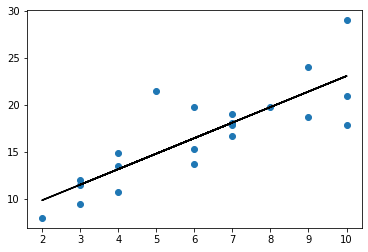

In [19]:
plt.scatter(dt['SortingT'],dt['DeliveryT'])
plt.plot(dt['SortingT'],pred,color='black')

#### We can visibly see that there is some outliers which is causing the model to lose its accuracy. RMSE & MSR is also very high for the inital model

## Checking for outliers

In [20]:
model_influence = model.get_influence()

In [21]:
model_influence

In [22]:
(c,_)=model_influence.cooks_distance

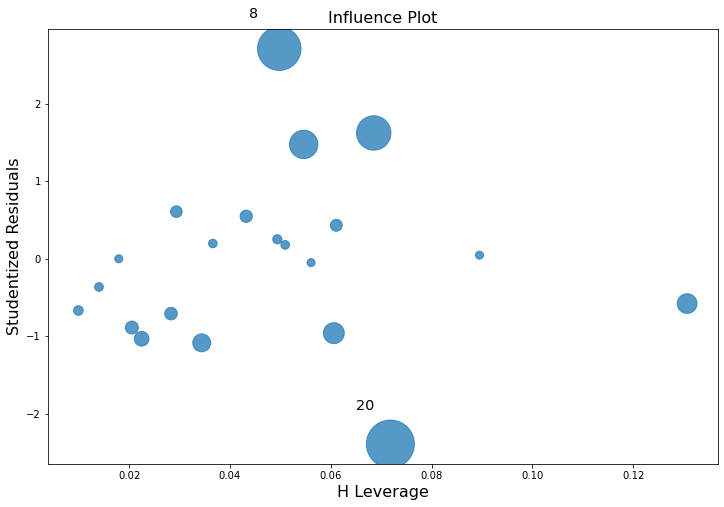

In [23]:
fig = sfig, ax = plt.subplots(figsize=(12,8))
sm.graphics.influence_plot(model, alpha  = 0.05, ax = ax, criterion="cooks");

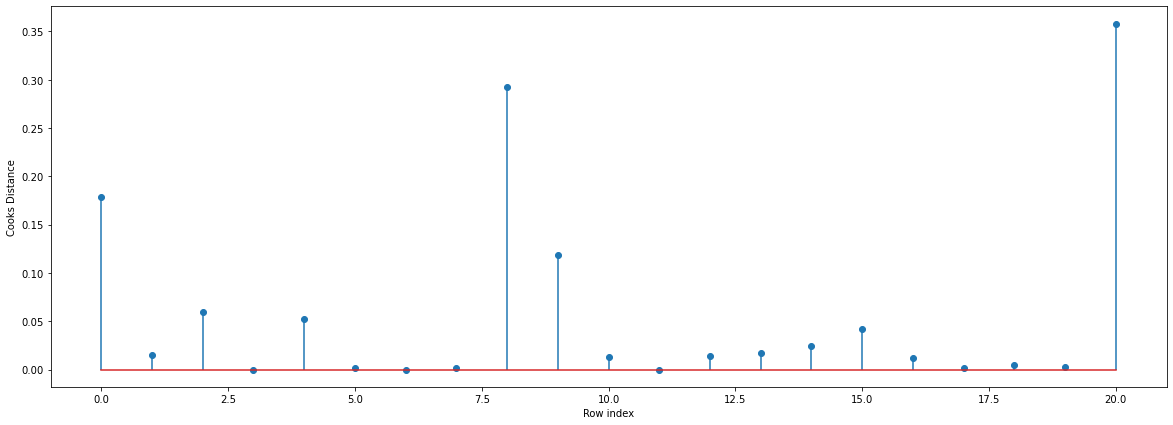

In [24]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(X)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

## Droping the Outliers

In [41]:
dt=dt.drop(dt.index[[0,7,20]])

In [64]:
(c,_)=model_influenceN.cooks_distance

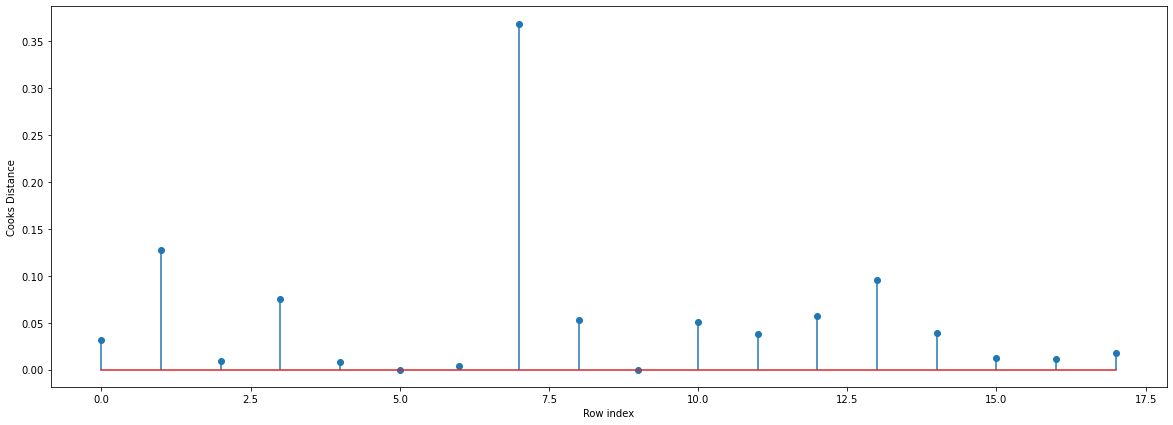

In [65]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(X_new)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

## Creating new model after removing outliers

In [63]:
X_new=dt[['SortingT']]
Y_new=dt['DeliveryT']
X_new.shape

(18, 1)

In [45]:
#creating model with OLS method
model_new=sm.OLS(X_new,Y_new).fit()

In [46]:
pred_new=model.predict()

In [47]:
pred_new

array([ 7.8180071 ,  5.02586171,  7.35264954,  8.93486526, 10.79629552,
        5.71459091,  7.073435  ,  3.5367175 ,  6.66392034,  6.98036349,
        7.38243242,  4.00207507,  6.20973136,  4.2812896 ,  4.47860121,
        5.53961646,  5.11893322,  6.74210041,  2.97828842,  6.63786032,
        8.00415013])

In [48]:
#creating model with sklearn library
model_sknew=LinearRegression()

In [49]:
model_sknew.fit(X_new,Y_new)

LinearRegression()

In [50]:
pred_N = model_sknew.predict(X_new)

In [51]:
#checking mean squre error
meansq_N = mean_squared_error(Y_new,pred_N)

In [52]:
rmse_new=np.sqrt(meansq_N)

In [53]:
meansq_N,rmse_new

(4.156781679779953, 2.038818697133208)

In [54]:
print(model_sknew.score(X_new, Y_new))

0.8402553414374412


#### After removining the outliers the RMSE & MSE has been reduces drastically and accuracy has increased as well

## Scatter plot between the data and predicted data

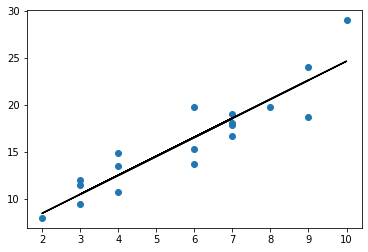

In [66]:
plt.scatter(dt['SortingT'],dt['DeliveryT'])
plt.plot(dt['SortingT'],pred_N,color='black')

# Observation

#### Through the above gragh we can visibly see that the predicted line is best fit for this model with all the transformation made.
### The accuracy of the model is 84.02%